In [1]:
import random
from matplotlib import pyplot as plt
from matplotlib import colors

# Parameters to decide what kind of graph is created.
# prob is the probability that a given square is an obstacle, a vertex with no edges. This parameter can extend
# the time it takes to generate a graph since each graph is only verified as valid after a shortest path is found.
# max_x and max_y are the dimensions of the graph
prob = .3
max_x = 32
max_y = 32
target = max_x * max_y - 1
# Use this toggle variable to switch between using weights from 1 to 100 to only 1 (uniform distance)
use_random_weights = True

def convert_to_name(x, y):
    return x + y * max_x

def name_to_grid(name):
    x = name % max_x
    y = name // max_x
    return x, y

# Define the class of vertexes, which we will have 
class Vertex:
    
    # Initialize a vertex with its location and probability that it is an obstacle
    # Also get max_x and max_y and have it hardcoded that these are not obstacles
    def __init__(self, in_x, in_y, prob, max_x, max_y):
        # Init
        self.edges = dict()
        self.x = in_x
        self.y = in_y
        self.max_x = max_x
        self.max_y = max_y
        # If the tile is a object or is it a
        self.name = convert_to_name(in_x, in_y)
        if ((in_x == 0 and in_y == 0) or (in_x == max_x - 1  and in_y == max_y - 1)):
            self.is_obstacle = 0
        else: 
            self.is_obstacle = int(random.randint(0,100) < prob * 100)
                        
    # Add a weight to edge dictionary
    def add_edge(self, x, y, weight):
        name = convert_to_name(x, y)
        self.edges[name] = weight

In [2]:
class Graph:
    
    def __init__(self):
        self.graph = dict()
        
    # Add a vertex to the graph
    def add_vertex(self, vertex):
        self.graph[vertex.name] = vertex
        
    # Given two vertexs, update the weights beteen them
    def add_edge(self, v1, v2, weight):
        self.graph[v1.name].add_edge(v2.x, v2.y, weight)
        self.graph[v2.name].add_edge(v1.x, v1.y, weight)
        
    # Given names, add the edge
    def add_edge_name(self, v1, v2, weight):
        x, y = name_to_grid(v2)
        self.graph[v1].add_edge(x, y, weight)
        x, y = name_to_grid(v1)
        self.graph[v2].add_edge(x, y, weight)
        

In [3]:
# Find shortest path given a graph
# Takes in a graph g
def shortest_path(g):
    visited = [0]
    # Dictionary that keeps track of the shortest path parent
    shortest_parent = dict()
    shortest_parent[0] = 0
    # The shortest amount of distance it takes to get to this
    distances = dict()
    distances[0] = 0
    
    curr = g.graph[0]
    
    # Of the form (parent, next_vertex, weight)
    queue = []
    
    # While we haven't found the target and 
    while (target not in visited):
        # Add the neighbors of current node to the queue
        for key in curr.edges:
            if key not in visited:
                # Add that to the queue
                queue.append([curr.name, key, curr.edges[key]])
                
        if not queue:
            return 'no solution', -1
                
        temp_dist_lst = []
        # Evaluate what should be the current by calculating the total distance to everything in the list.
        # Each parent should be in the distances dictionary
        for ind, entry in enumerate(queue):
            # Equal to cost to get there + weight
            temp_dist_lst.append(distances[entry[0]] + entry[2])
        
        # Good to attempt to follow algorithm
        #print(queue)
        #print(temp_dist_lst)
        
        # Find the minimum, add that to visited, this is the next curr
        next_ind = temp_dist_lst.index(min(temp_dist_lst))
        temp = queue[next_ind]
        
        # Update the required dictionaries and lists
        distances[temp[1]] = temp_dist_lst[next_ind]
        visited.append(temp[1])
        shortest_parent[temp[1]] = temp[0]
        
        # Clean the queue if any next node is the finished node
        queue = [elem for elem in queue if elem[1] != temp[1]]
        
        if g.graph[temp[1]].name == target:
            r_lst = []
            next_tar = target
            while 0 not in r_lst:
                r_lst.insert(0,next_tar)
                next_tar = shortest_parent[next_tar]
            r_dist = distances[temp[0]] + temp[2]
            return r_lst, r_dist
        
        # Finally set the curr node for the next iteration
        curr = g.graph[temp[1]]            
    
    return shortest_parent    

In [4]:
# Initialize parameters
def generate_graph():
    g = Graph()
    # Determine which tiles are obstacles and display it
    for y in range(max_y):
        for x in range(max_x):
            g.add_vertex(Vertex(x, y, prob, max_x, max_y))

    # Initialize all edges now
    for y in range(max_y):
        for x in range(max_x):
            # v1 is current vertex
            v1 = g.graph[convert_to_name(x, y)]
            # Continue if this vertex is a obstacle
            if g.graph[convert_to_name(x, y)].is_obstacle == 1:
                continue
            is_top = y == 0
            is_bot = y == max_y - 1
            is_left = x == 0
            is_right = x == max_x - 1

            # If it has an edge in that direction add it if it is not a obstacle
            if not is_top and g.graph[convert_to_name(x, y-1)].is_obstacle != 1:
                v2 = g.graph[convert_to_name(x, y-1)]
                if use_random_weights: 
                    g.add_edge(v1, v2, random.randint(1,100))
                else:
                    g.add_edge(v1, v2, 1)
            if not is_bot and g.graph[convert_to_name(x, y+1)].is_obstacle != 1:
                v2 = g.graph[convert_to_name(x, y+1)]
                if use_random_weights: 
                    g.add_edge(v1, v2, random.randint(1,100))
                else:
                    g.add_edge(v1, v2, 1)
            if not is_left and g.graph[convert_to_name(x-1, y)].is_obstacle != 1:
                v2 = g.graph[convert_to_name(x-1, y)]
                if use_random_weights: 
                    g.add_edge(v1, v2, random.randint(1,100))
                else:
                    g.add_edge(v1, v2, 1)
            if not is_right and g.graph[convert_to_name(x+1, y)].is_obstacle != 1:
                v2 = g.graph[convert_to_name(x+1, y)]
                if use_random_weights: 
                    g.add_edge(v1, v2, random.randint(1,100))
                else:
                    g.add_edge(v1, v2, 1)
    return g

In [5]:
def get_valid_graph():
    g = generate_graph()
    path, dst = shortest_path(g)
    while dst == -1:
        g = generate_graph()
        path, dst = shortest_path(g)
    return g, path, dst

def visualize_graph(g, path):
    # Convert to grid layout for display
    grid = []
    for y in range(max_y):
        temp = []
        for x in range(max_x):
            temp = temp + [g.graph[convert_to_name(x, y)].is_obstacle]
        grid = grid + [temp]

    # Visualize graph

    # Show graph without shortest path
    cmap = colors.ListedColormap(['White', 'Black'])
    plt.figure(figsize=(10,10))
    plt.pcolor(grid[::-1], cmap=cmap, edgecolors='k',)
    plt.show()

    # Show graph with shortest path
    for cell in path:
        x, y = name_to_grid(cell)
        grid[y][x] = 2
    cmap = colors.ListedColormap(['White', 'Black', 'Red'])
    plt.figure(figsize=(10,10))
    plt.pcolor(grid[::-1], cmap=cmap, edgecolors='k',)
    plt.show()

In [6]:
# Functions to write graph to file. Our C++ code requires that we add vertices first, and then edges. We will create a txt
# with this paradigm in mind.
# Returns nothing, but creates two files in the directory, one is the solution, the other is the actual txt used to generate
# the same graph in our C++ code.
def write_graph_to_file(g, path, dist):
    file_str = str(max_x) + 'x' + str(max_y) + '-'
    
    # Write the solution file
    sol_file = open(file_str + 'solution.txt', 'w+')
    sol_file.write(str(dist) + '\n')
    for v in path:
        sol_file.write(str(v) + '\n')
    sol_file.close()
    
    # Write the input file
    input_file = open(file_str + 'input.txt', 'w+')
    # First write the vertices to create in the format
    for key in g.graph.keys():
        v = g.graph[key]
        s = str(v.name) + ' ' + str(v.x) + ' ' + str(v.y) + '\n'
        input_file.write(s)
        
    # Write a line of '---' to separate
    input_file.write('---')
    
    # Now write each of the edges
    for key in g.graph.keys():
        edge_dict = g.graph[key].edges
        for edge in edge_dict.keys():
            input_file.write('\n')
            s = str(g.graph[key].name) + ' ' + str(edge) + ' ' + str(edge_dict[edge])
            input_file.write(s)
    input_file.close()

In [7]:
# Method of cross checking input/reloading back into python
# Note that the above parameters (max_x, max_y) need to have values before this function is defined to work
# as intended
def read_graph_from_file(filename):
    input_file = open(filename, 'r')
    line = input_file.readline()
    return_graph = Graph()
    # Add vertices
    while '---' not in line:
        chars = line.split()
        # Prob hardcoded to 0, we will manually set obstacles
        vertex = Vertex(int(chars[1]), int(chars[2]), 0, max_x, max_y)
        return_graph.add_vertex(vertex)
        line = input_file.readline()
    # Get the edges and add them
    for line in input_file:
        chars = line.split()
        return_graph.add_edge_name(int(chars[0]), int(chars[1]), int(chars[2]))
    # Set is_obstacle so it will display properly
    for key in return_graph.graph.keys():
        v = return_graph.graph[key]
        if not v.edges:
            return_graph.graph[v.name].is_obstacle = 1
    return return_graph


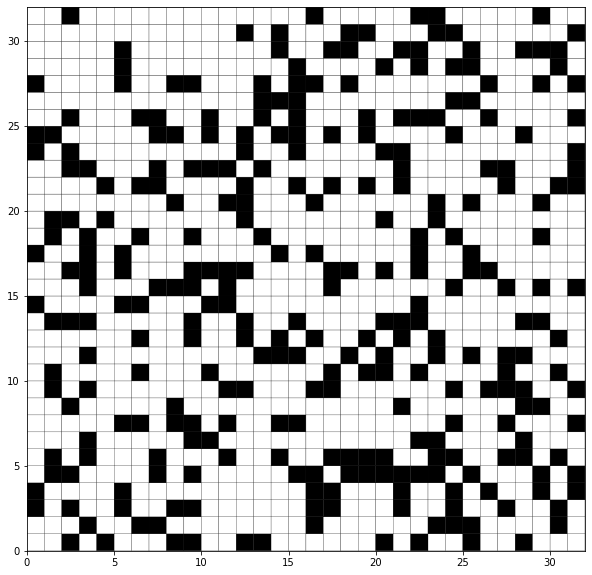

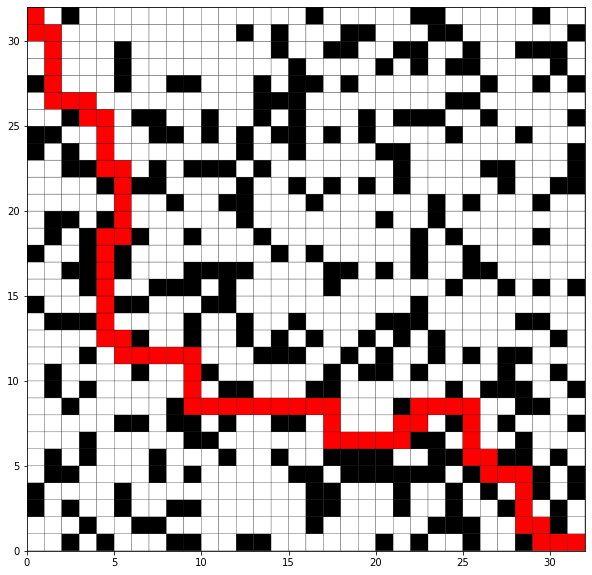

In [8]:
# Code that is run when script is run. Creates a valid graph, visualizes it, and writes it to the file.
if __name__ == '__main__':
    g, path, dst = get_valid_graph()
    visualize_graph(g, path)
    write_graph_to_file(g, path,dst)

In [9]:
# Example of how to read in a file
#g = read_graph_from_file('32x32-input.txt')
#path, dst = shortest_path(g)
#visualize_graph(g, path)